In [1]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [2]:
from minke import sources

In [3]:
import matplotlib.pyplot as plt
#import thesis
%matplotlib inline

In [4]:
from gwpy.timeseries import TimeSeries

In [5]:
source_list = [sources.Gaussian(duration = 0.01, hrss = 1e-21, time = 100 ),
           sources.SineGaussian(q=8, frequency=100, hrss=1e-21, time=100, polarisation='linear'),
           sources.WhiteNoiseBurst(duration=0.05, bandwidth=1000, frequency=1000, hrss=1e-21, time=100),
               #sources.BBHRingdown(time=100, phi0=0, mass=20, spin=0, massloss=4, distance=100, inclination=0)
          ]

In [6]:
from matplotlib import rc, font_manager
from math import atan2,degrees
import numpy as np
from matplotlib import rc, font_manager
import matplotlib.patheffects as path_effects

colors = {"blue": "#348ABD",
          "red": "#E24A33",
          "purple": "#988ED5",
          "gray": "#777777",
          "yellow": "#FBC15E",
}

figwidth = 5 # 2.5
figheight = figwidth/1.616
figsize = (figwidth, figheight)


## FONTS

ssp_legend = {'family': 'Source Code Pro',
              'weight': 'normal',
              'size': 9,
}

lato = {'family': 'Lato',
        'color':  'black',
        'weight': 'light',
        'size': 11,
}
ssp_ticks = {'family': 'Source Code Pro',
             'weight': 'light',
             'size': 9,
}

ticks_font = font_manager.FontProperties(**ssp_ticks)

def thesisify(f, height=1):
    rc("mathtext", fontset="custom", sf="Source Code Pro", tt="Source Code Pro", rm="Source Code Pro")
    # make the figure look the correct size
    f.set_figwidth(figwidth)
    f.set_figheight(height * figheight)

    # individual axis manipulations
    for ax in f.axes:
        #ax.get_yaxis().get_major_formatter()._useMathText=False
        #ax.get_xaxis().get_major_formatter()._useMathText=False
        for label in ax.get_xticklabels():
            label.set_fontproperties(ticks_font)
        ax.set_xlabel(ax.get_xlabel(), fontdict=lato)  
        ax.xaxis.get_offset_text().set_fontproperties(ticks_font)
        for label in ax.get_yticklabels():
            label.set_fontproperties(ticks_font)
        ax.set_ylabel(ax.get_ylabel(), fontdict=lato) 
        ax.yaxis.get_offset_text().set_fontproperties(ticks_font)
        
        if len(ax.get_ygridlines()) > 0:
            ax.grid(which="both", color='#348ABD', alpha=0.2, lw=0.3,)
        
    f.tight_layout()
    return f


3441
4381
17203


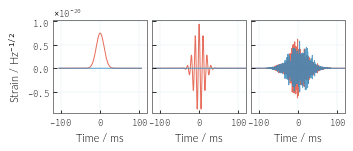

In [12]:
f, ax = plt.subplots(1,len(source_list), dpi=300, sharey=True)

for i, source in enumerate(source_list):
    data = source._generate()
    print(len(data[0].data.data))
    data_gw_p = TimeSeries(data = data[0].data.data, t0=data[0].epoch, dt = data[0].deltaT)
    data_gw_c = TimeSeries(data = data[1].data.data, t0=data[1].epoch, dt = data[1].deltaT)
    ax[i].plot((data_gw_p.times.value-100)*1e3, data_gw_p.value, lw=1, alpha=0.8)
    ax[i].plot((data_gw_c.times.value-100)*1e3, data_gw_c.value, lw=1, alpha=0.8)

    
    
    ax[i].set_xlabel("Time / ms")

    ax[i].set_xticks([-100, 0, 100])
    ax[i].set_xlim([-120,120])
    
#ax[2,0].set_ylabel("Frequency [Hz]")
#ax[1,0].set_ylabel("Frequency [Hz]")
ax[0].set_ylabel("Strain / Hz$^{-1/2}$")
    
        
f = thesisify(f, height=0.7);
f.subplots_adjust(wspace=0.05, hspace=0.2)



f.savefig("{}/sources/minke-adhoc.{}".format(fig_dir, fig_ext))
